In [8]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [23]:
df_train = pd.read_csv('Data/train_iris.csv', index_col=0)
df_test = pd.read_csv('Data/test_iris.csv', index_col=0)

In [20]:
np.random.seed(0)

In [39]:
X_train = df_train.drop(['species'], axis=True)
X_test = df_test.drop(['species'], axis=True)
Y_train = df_train.species
Y_test = df_test.species

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [41]:
max_depth_value = range(1, 42)
scores_data = pd.DataFrame()

In [42]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
#    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
#                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

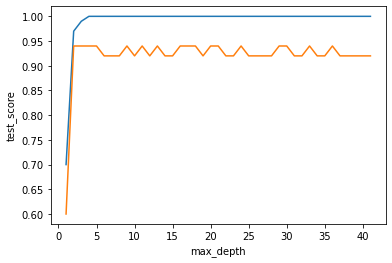

In [43]:
sns.lineplot(x='max_depth', y='train_score', data=scores_data)
sns.lineplot(x='max_depth', y='test_score', data=scores_data)